### Comparing Gravitational waveforms to each other###

In [1]:
# Install the software we need
import sys
!{sys.executable} -m pip install pycbc lalsuite --no-cache-dir

Text(0,0.5,'Strain')

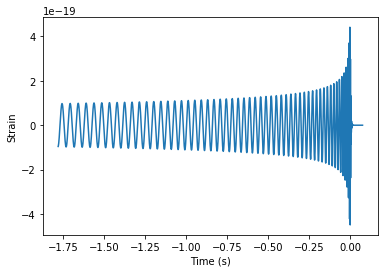

In [2]:
%matplotlib inline
# We learn about the potential parameters of a source by comparing it to many different waveforms
# each of which represents a possible source with different properties. 
import pylab
from pycbc.waveform import get_td_waveform

# We can directly compare how similar waveforms are to each other using an inner product between then called 
# a 'match'. This maximizes over the possible time of arrival and phase. We'll generate a reference waveform
# which we'll compare to.
m1 = m2 = 20
f_lower = 20
approximant = "SEOBNRv4"
delta_t = 1.0 / 2048
hp, _ = get_td_waveform(approximant=approximant,
                         mass1=m1, mass2=m2,
                         delta_t=delta_t, f_lower=f_lower)
pylab.plot(hp.sample_times, hp)
pylab.xlabel('Time (s)')
pylab.ylabel('Strain')

(20, 1000)

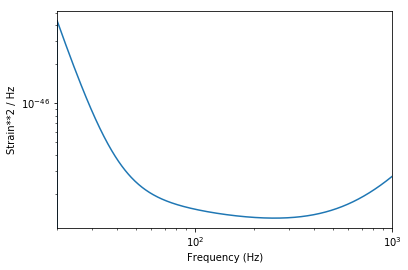

In [3]:
# How similar waveforms are to each other depends on how important we consider different frequencies, we 
# can account for this by weighting with an estimated power spectral density. We'll use here 
# the predicted final Advanced LIGO final design sensitivity
from pycbc.psd import aLIGOZeroDetHighPower
psd = aLIGOZeroDetHighPower(len(hp) / 2 + 1, 1.0 / hp.duration, f_lower)

pylab.loglog(psd.sample_frequencies, psd)
pylab.xlabel('Frequency (Hz)')
pylab.ylabel('Strain**2 / Hz')
pylab.xlim(20, 1000)

(-0.05, 0.02)

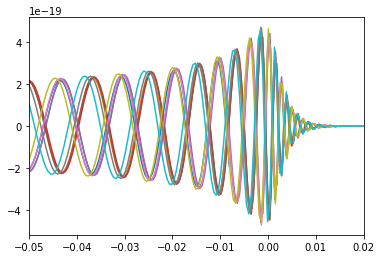

In [4]:
# We can now compare how similar our waveform is to others with different masses
from pycbc.filter import match
import numpy

masses = numpy.arange(19, 21, .2)
matches = []
for m2 in masses:
    hp2, _ = get_td_waveform(approximant=approximant,
                         mass1=m1, mass2=m2,
                         delta_t=delta_t, f_lower=f_lower)
    hp2 = hp2[:len(hp)] if len(hp) < len(hp2) else hp2
    hp2.resize(len(hp))
    
    m, idx = match(hp, hp2, psd=psd, low_frequency_cutoff=f_lower)
    matches.append(m)
    pylab.plot(hp2.sample_times, hp2)
pylab.xlim(-.05, .02)

Text(0.5,0,'Mass of second object (Solar Masses)')

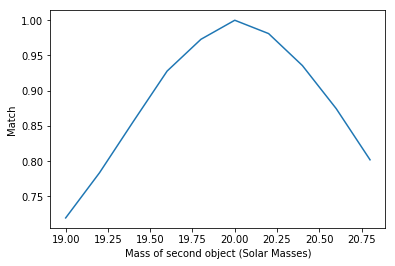

In [5]:
pylab.plot(masses, matches)
pylab.ylabel('Match')
pylab.xlabel('Mass of second object (Solar Masses)')

# You can think of the match also as the fraction of signal-to-noise that you could recover with a template that 
# doesn't *exactly* look like your source